In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [3]:
# Загружаем данные из pandas
data = pd.read_csv('../csv_file/train.csv')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16500\1310205317.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449

In [4]:
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [5]:
data.isnull().sum()

report_date        0
client_id          0
target             0
col1           14453
col2           14450
               ...  
col2659        13950
col2660         6420
col2661         6420
col2662         6420
col2663            0
Length: 2666, dtype: int64

In [6]:
threshold = 0.9
print(len(data))
deleate = int(len(data) * (1 - threshold))
df_clean = data.dropna(axis=1,thresh=deleate)
df_clean = df_clean.drop_duplicates(subset=['client_id'])
df_clean

14456


,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,2023-01-01,8294,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,NaN,NaN,NaN,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,6868510.0,0.258007
14431,2022-10-01,4919,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217
14434,2023-02-01,8296,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,0.257217
14446,2022-10-01,8302,0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148


In [7]:
df_clean.shape

(4817, 711)

<Axes: >

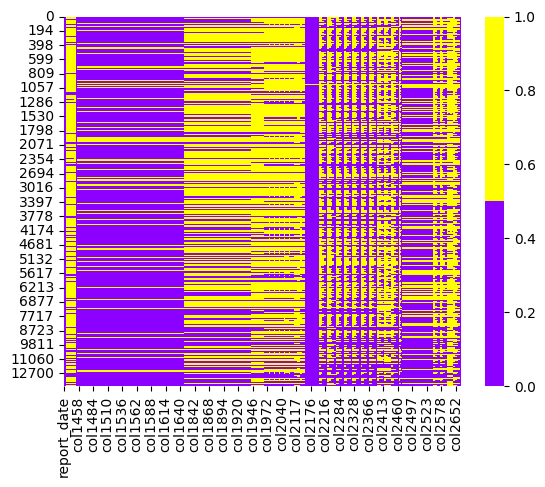

In [8]:
cols = df_clean.columns
#фиолетовые - не пропущенные данные, желтые - пропущенные
colours = ['#8b00ff', '#ffff00']
sns.heatmap(df_clean[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
missing_percentage = df_clean.isnull().mean() * 100

print("Процент пропусков в каждой колонке:")
print(missing_percentage)

Процент пропусков в каждой колонке:
report_date     0.000000
client_id       0.000000
target          0.000000
col476         83.246834
col480         83.246834
                 ...    
col2656        51.152169
col2660        39.505917
col2661        39.505917
col2662        39.505917
col2663         0.000000
Length: 711, dtype: float64


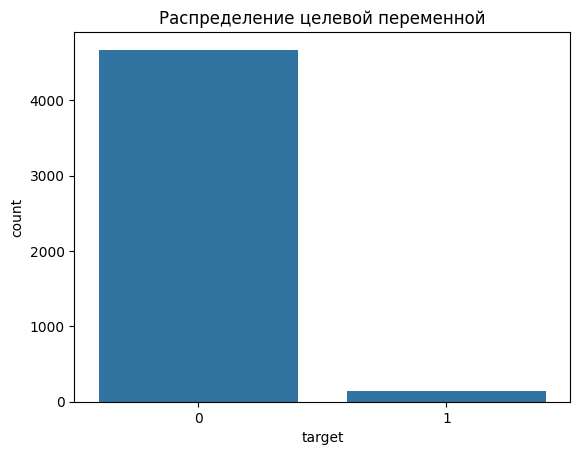

In [10]:
sns.countplot(x='target', data=df_clean)
plt.title('Распределение целевой переменной')
plt.show()

In [11]:
df_clean.head(10)

,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [12]:
df_sorted = data.sort_values(by='col2663', ascending=False)
df_sorted.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
14073,2023-02-01,1150,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
8996,2022-11-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
6389,2022-12-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
790,2022-08-01,1150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339800
564,2023-02-01,843,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338927


In [13]:
object_columns = df_clean.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': ['report_date', 'col520', 'col528', 'col536', 'col544', 'col552', 'col592', 'col600', 'col608', 'col1454']


In [14]:
df_clean = df_clean.drop(columns=['client_id','report_date', 'col520', 'col528', 'col536', 'col544', 'col552', 'col592', 'col600', 'col608', 'col1454'])


In [15]:
object_columns = df_clean.select_dtypes(include=['object']).columns
print(f"\nСтолбцы с типом данных 'object': {object_columns.tolist()}")


Столбцы с типом данных 'object': []


In [16]:
df_clean = df_clean.replace(0, np.nan)  # Временно заменяем нули на NaN
df_clean = df_clean.fillna(df_clean.mode().iloc[0])

In [17]:
df_clean.head(50)

,target,col476,col480,col484,col488,col492,col496,col500,col504,col508,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.256261
1,1.0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,37.617100,37.6171,...,3000000.0,3000000.0,3000000.0,7616803.0,7616803.0,7616803.0,7616803.00,7616803.00,7616803.00,0.256261
2,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.256261
3,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.258682
4,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.254164
5,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.00,10850000.00,10850000.00,0.318994
6,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.258853
7,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.256261
8,1.0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,37.617100,37.6171,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.266285
9,1.0,59.8983,59.8983,59.898300,59.8983,59.898300,30.2618,30.2618,30.261801,30.2618,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.00,3000000.00,3000000.00,0.256261


In [18]:
threshold = 0.01


low_corr_columns = df_clean.columns[(df_clean.abs() < threshold).all()]
low_corr_columns_list = low_corr_columns.tolist()
low_corr_columns_list

[]

In [19]:
# df_clean = df_clean.drop(columns=[['col1471',
#  'col1479',
#  'col1480',
#  'col1481',
#  'col1482',
#  'col1483',
#  'col1484',
#  'col1485',
#  'col1486',
#  'col1495',
#  'col1519',
#  'col1520',
#  'col1521',
#  'col1522',
#  'col1525',
#  'col1527',
#  'col1528',
#  'col1529',
#  'col1530',
#  'col1531',
#  'col1532',
#  'col1533',
#  'col1534',
#  'col1535',
#  'col1536',
#  'col1537',
#  'col1538',
#  'col1539',
#  'col1540',
#  'col1541',
#  'col1542',
#  'col1543',
#  'col1544',
#  'col1545',
#  'col1546',
#  'col1547',
#  'col1548',
#  'col1549',
#  'col1550',
#  'col1551',
#  'col1552',
#  'col1553',
#  'col1554',
#  'col1555',
#  'col1556',
#  'col1557',
#  'col1558',
#  'col1559',
#  'col1560',
#  'col1561',
#  'col1562',
#  'col1563',
#  'col1564',
#  'col1565',
#  'col1566',
#  'col1567',
#  'col1568',
#  'col1569',
#  'col1570',
#  'col1571',
#  'col1572',
#  'col1573',
#  'col1574',
#  'col1575',
#  'col1576',
#  'col1577',
#  'col1578',
#  'col1579',
#  'col1580',
#  'col1581',
#  'col1582',
#  'col1583',
#  'col1584',
#  'col1585',
#  'col1586',
#  'col1587',
#  'col1588',
#  'col1589',
#  'col1590',
#  'col1591',
#  'col1592',
#  'col1593',
#  'col1594',
#  'col1595',
#  'col1596',
#  'col1597',
#  'col1598',
#  'col1599',
#  'col1600',
#  'col1601',
#  'col1602',
#  'col1603',
#  'col1604',
#  'col1605',
#  'col1606',
#  'col1607',
#  'col1608',
#  'col1609',
#  'col1610',
#  'col1611',
#  'col1612',
#  'col1613',
#  'col1614',
#  'col1615',
#  'col1616',
#  'col1617',
#  'col1618',
#  'col1619',
#  'col1620',
#  'col1621',
#  'col1622',
#  'col1623',
#  'col1624',
#  'col1625',
#  'col1626',
#  'col1627',
#  'col1628',
#  'col1629',
#  'col1630',
#  'col1631',
#  'col1632',
#  'col1633',
#  'col1634',
#  'col1635',
#  'col1636',
#  'col1637',
#  'col1638',
#  'col1639',
#  'col1640',
#  'col1641',
#  'col1642',
#  'col1643',
#  'col1644',
#  'col1645',
#  'col1646',
#  'col1863',
#  'col1871',
#  'col1872',
#  'col1873',
#  'col1874',
#  'col1875',
#  'col1876',
#  'col1877',
#  'col1878',
#  'col1879',
#  'col1880',
#  'col1881',
#  'col1882',
#  'col1883',
#  'col1884',
#  'col1885',
#  'col1886',
#  'col1887',
#  'col1888',
#  'col1889',
#  'col1890',
#  'col1891',
#  'col1892',
#  'col1893',
#  'col1894',
#  'col1911',
#  'col1912',
#  'col1913',
#  'col1914',
#  'col1915',
#  'col1916',
#  'col1917',
#  'col1918',
#  'col2503',
#  'col2504',
#  'col2505',
#  'col2506',
#  'col2507',
#  'col2508',
#  'col2509',
#  'col2510',
#  'col2511',
#  'col2512',
#  'col2513',
#  'col2514',
#  'col2515',
#  'col2516',
#  'col2517',
#  'col2518',
#  'col2519',
#  'col2520',
#  'col2521',
#  'col2522',
#  'col2523',
#  'col2524',
#  'col2525',
#  'col2526',
#  'col2527',
#  'col2528',
#  'col2529',
#  'col2530',
#  'col2531',
#  'col2532',
#  'col2533',
#  'col2534']])

In [20]:
column_names = df_clean.columns.tolist()
column_names

['target',
 'col476',
 'col480',
 'col484',
 'col488',
 'col492',
 'col496',
 'col500',
 'col504',
 'col508',
 'col512',
 'col1453',
 'col1455',
 'col1456',
 'col1457',
 'col1458',
 'col1459',
 'col1460',
 'col1461',
 'col1462',
 'col1463',
 'col1464',
 'col1465',
 'col1466',
 'col1467',
 'col1468',
 'col1469',
 'col1470',
 'col1471',
 'col1472',
 'col1473',
 'col1474',
 'col1475',
 'col1476',
 'col1477',
 'col1478',
 'col1479',
 'col1480',
 'col1481',
 'col1482',
 'col1483',
 'col1484',
 'col1485',
 'col1486',
 'col1487',
 'col1488',
 'col1489',
 'col1490',
 'col1491',
 'col1492',
 'col1493',
 'col1494',
 'col1495',
 'col1496',
 'col1497',
 'col1498',
 'col1499',
 'col1500',
 'col1501',
 'col1502',
 'col1503',
 'col1504',
 'col1505',
 'col1506',
 'col1507',
 'col1508',
 'col1509',
 'col1510',
 'col1511',
 'col1512',
 'col1513',
 'col1514',
 'col1515',
 'col1516',
 'col1517',
 'col1518',
 'col1519',
 'col1520',
 'col1521',
 'col1522',
 'col1523',
 'col1524',
 'col1525',
 'col1526',
 'c

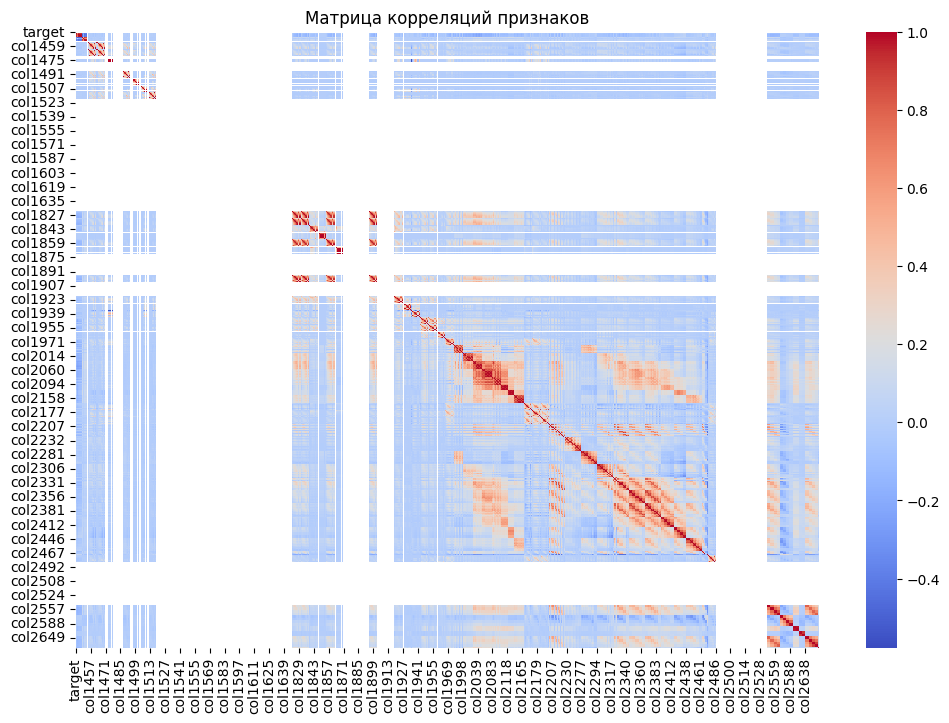

In [21]:
# Анализ корреляций
correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Матрица корреляций признаков')
plt.show()

In [22]:
df_clean.to_csv('train_edit3.csv', index=False)